# [Prophet](https://facebook.github.io/prophet/docs/quick_start.html)

Modelo ajustado pelo Prophet:

$$
y(t) = g(t) + s(t) + h(t) + e(t)
$$

* $g$ Modelar a tendência.
* $s$ Mudanças periódicas.
* $h$ Efeitos específicos - como, por exemplo, feriados.
* $e$ Informações que não foram refletidas no modelo. Geralmente é modelado como ruído.

In [20]:
! pip install prophet plotly

## Primeiras previsões

In [21]:
import pandas as pd

CSV_BR_LAND_TEMP = './data/processed/brazil_land_temp.csv'

df_br = pd.read_csv(CSV_BR_LAND_TEMP, parse_dates=['dt'])

df_br.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Month
0,1832-01-01,24.935,1.372,Brazil,1
1,1832-02-01,24.505,1.953,Brazil,2
2,1832-03-01,24.617,1.359,Brazil,3
3,1832-04-01,23.990,2.013,Brazil,4
4,1832-05-01,23.124,1.592,Brazil,5


In [27]:
df_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2164 non-null   datetime64[ns]
 1   AverageTemperature             2164 non-null   float64       
 2   AverageTemperatureUncertainty  2164 non-null   float64       
 3   Country                        2164 non-null   object        
 4   Month                          2164 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 84.7+ KB


Para a utilização do Prophet, é necessário especificar duas variáveis:

* `ds`: Coluna onde estão as datas
* `y`: Coluna onde estão os dados target - aqueles que serão previstos

In [22]:
from matplotlib import pyplot as plt
from prophet import Prophet

df = pd.DataFrame()
df['ds'] = df_br['dt']
df['y'] = df_br['AverageTemperature']

df.head()

,ds,y
0,1832-01-01,24.935
1,1832-02-01,24.505
2,1832-03-01,24.617
3,1832-04-01,23.990
4,1832-05-01,23.124


In [23]:
model = Prophet()

model.fit(df)

df_future = model.make_future_dataframe(periods=0)

df_future.head()

14:41:21 - cmdstanpy - INFO - Chain [1] start processing
14:41:21 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,1832-01-01
1,1832-02-01
2,1832-03-01
3,1832-04-01
4,1832-05-01


In [24]:
predictions = model.predict(df_future)

predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1832-01-01,23.960106,24.036690,25.146723,23.960106,23.960106,0.599845,0.599845,0.599845,0.599845,0.599845,0.599845,0.0,0.0,0.0,24.559951
1,1832-02-01,23.961198,24.006088,25.081332,23.961198,23.961198,0.581376,0.581376,0.581376,0.581376,0.581376,0.581376,0.0,0.0,0.0,24.542574
2,1832-03-01,23.962220,23.730002,24.848207,23.962220,23.962220,0.350025,0.350025,0.350025,0.350025,0.350025,0.350025,0.0,0.0,0.0,24.312245
3,1832-04-01,23.963312,23.270537,24.395251,23.963312,23.963312,-0.154410,-0.154410,-0.154410,-0.154410,-0.154410,-0.154410,0.0,0.0,0.0,23.808902
4,1832-05-01,23.964369,22.640880,23.761623,23.964369,23.964369,-0.780073,-0.780073,-0.780073,-0.780073,-0.780073,-0.780073,0.0,0.0,0.0,23.184296


In [25]:
predictions.head(3).T

,0,1,2
ds,1832-01-01 00:00:00,1832-02-01 00:00:00,1832-03-01 00:00:00
trend,23.960106,23.961198,23.96222
yhat_lower,24.03669,24.006088,23.730002
yhat_upper,25.146723,25.081332,24.848207
trend_lower,23.960106,23.961198,23.96222
trend_upper,23.960106,23.961198,23.96222
additive_terms,0.599845,0.581376,0.350025
additive_terms_lower,0.599845,0.581376,0.350025
additive_terms_upper,0.599845,0.581376,0.350025
yearly,0.599845,0.581376,0.350025


|Coluna|Descrição|
|-:|:-|
|`ds`|Data/Hora que os valores se relacionam|
|`trend`|Valor de tendência sozinho|
|`yhat_lower`|Limite inferior do intervalo de incerteza sobre a previsão|
|`yhat_upper`|Limite superior do intervalo de incerteza sobre a previsão|
|`trend_lower`|Limite inferior do intervalo de incerteza sobre a tendência|
|`trend_upper`|Limite superior do intervalo de incerteza sobre a tendência|
|`additive_terms`|Valor combinado de todas as sazionalidades aditivas|
|`additive_terms_lower`|Limite inferior do intervalo de incerteza sobre as sazionalidades aditivas|
|`additive_terms_upper`|Limite superior do intervalo de incerteza sobre as sazionalidades aditivas|
|`yearly`|Valor da sazionalidade anual sozinho|
|`yearly_lower`|Limite inferior do intervalo de incerteza sobre as sazionalidades anuais|
|`yearly_upper`|Limite superior do intervalo de incerteza sobre as sazionalidades anuais|
|`multiplicative_terms`|Valor combinado de todas as sazionalidades aditivas|
|`multiplicative_terms_lower`|Limite inferior do intervalo de incerteza sobre as sazionalidades multiplicativas|
|`multiplicative_terms_upper`|Limite superior do intervalo de incerteza sobre as sazionalidades multiplicativas|
|`yhat`|Valor final previsto - combinação da tendência, termos multiplicativos e aditivos|

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(116.97222222222221, 0.5, 'Temperatura')

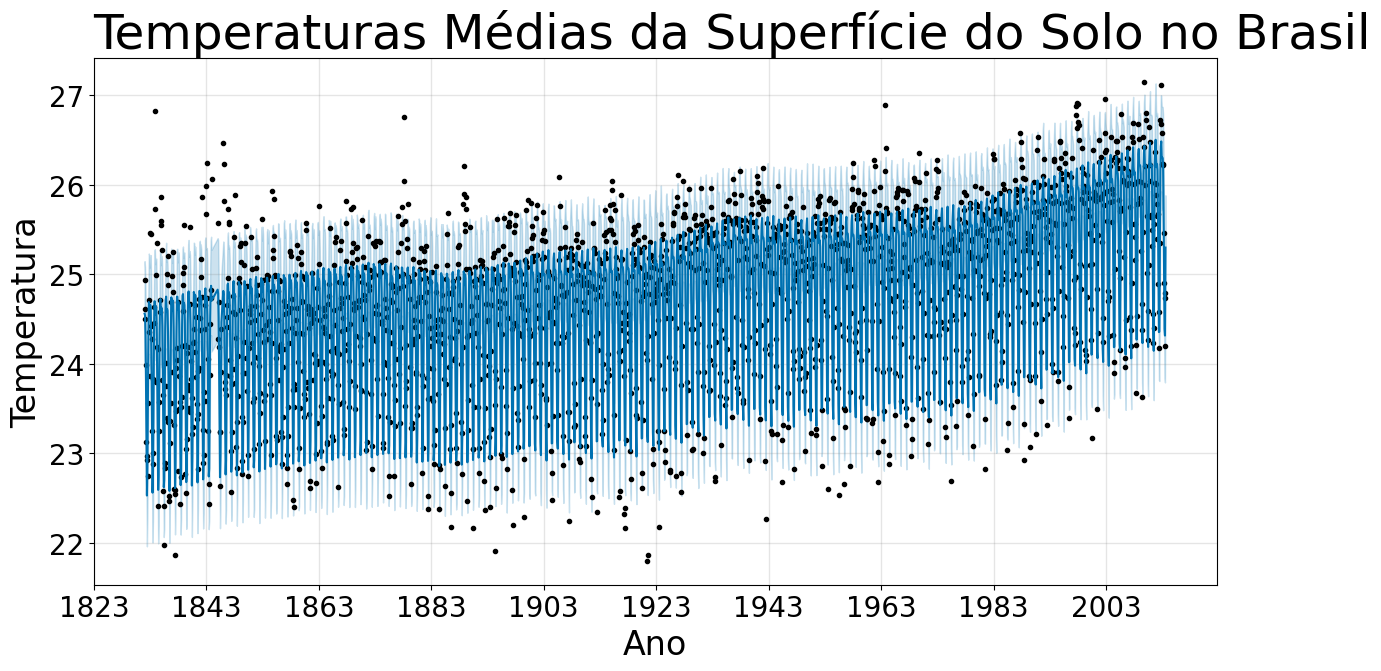

In [26]:
model.plot(predictions,
           figsize=(12, 6))

plt.title('Temperaturas Médias da Superfície do Solo no Brasil',
          loc='left',
          fontsize=35)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura', fontsize=24)

## Compreendendo gráficos componentes

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

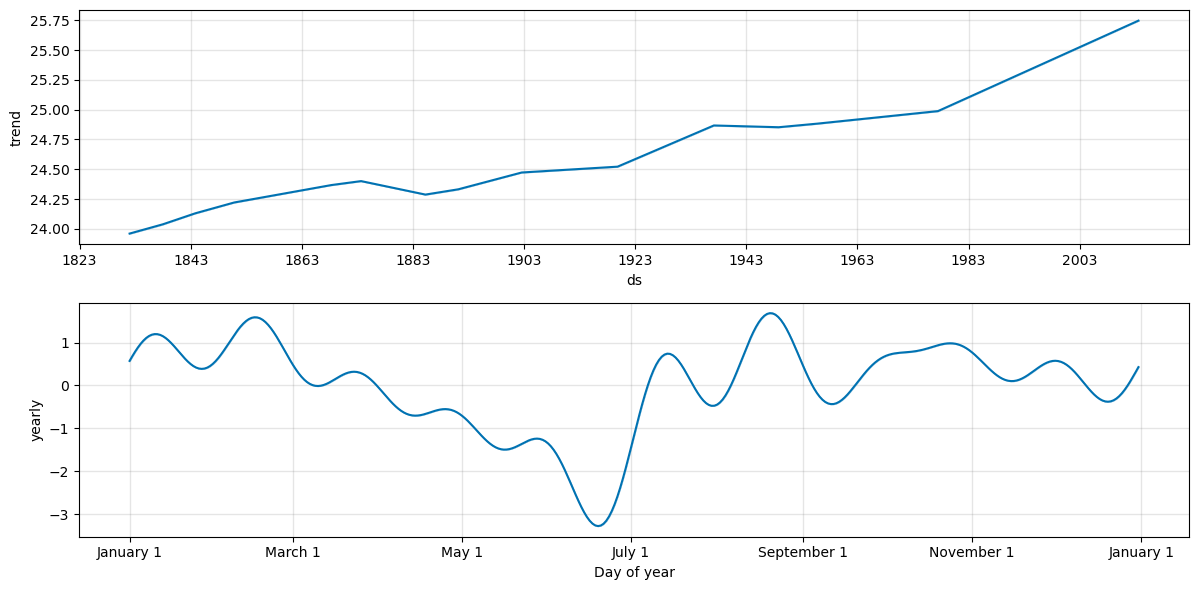

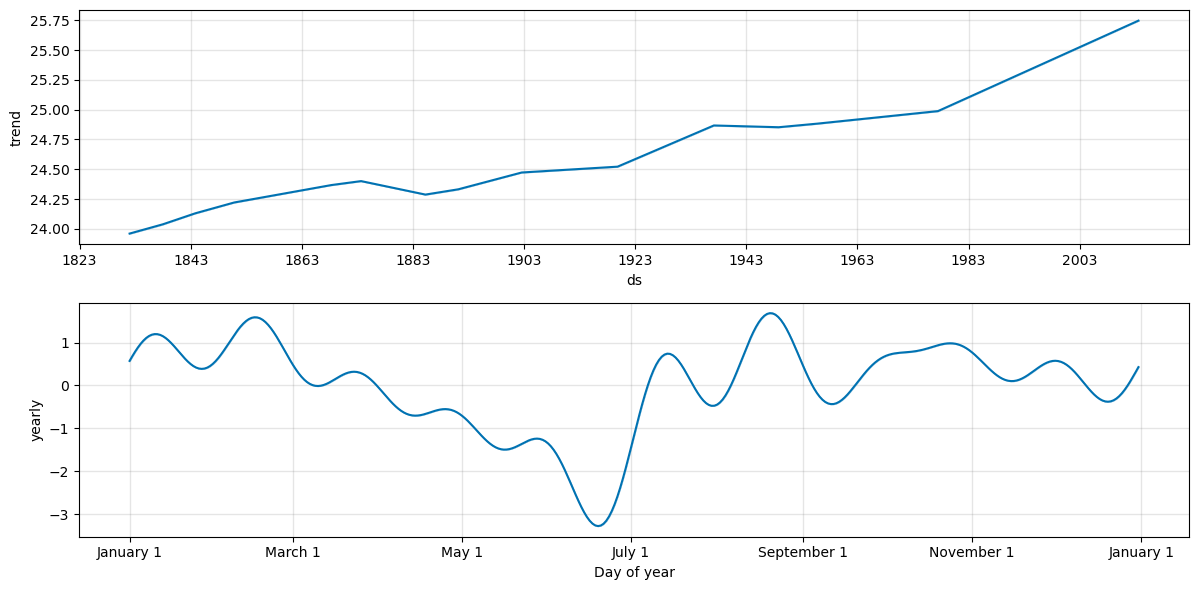

In [28]:
model.plot_components(predictions,
                      figsize=(12, 6))

## Adicionando período de previsão

In [29]:
model = Prophet()

model.fit(df)

# Período de 10 anos (120 meses)
df_future = model.make_future_dataframe(periods=120,
                                        freq='M')

predicitons = model.predict(df_future)

predictions.head()

14:45:54 - cmdstanpy - INFO - Chain [1] start processing
14:45:54 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1832-01-01,23.960106,24.036690,25.146723,23.960106,23.960106,0.599845,0.599845,0.599845,0.599845,0.599845,0.599845,0.0,0.0,0.0,24.559951
1,1832-02-01,23.961198,24.006088,25.081332,23.961198,23.961198,0.581376,0.581376,0.581376,0.581376,0.581376,0.581376,0.0,0.0,0.0,24.542574
2,1832-03-01,23.962220,23.730002,24.848207,23.962220,23.962220,0.350025,0.350025,0.350025,0.350025,0.350025,0.350025,0.0,0.0,0.0,24.312245
3,1832-04-01,23.963312,23.270537,24.395251,23.963312,23.963312,-0.154410,-0.154410,-0.154410,-0.154410,-0.154410,-0.154410,0.0,0.0,0.0,23.808902
4,1832-05-01,23.964369,22.640880,23.761623,23.964369,23.964369,-0.780073,-0.780073,-0.780073,-0.780073,-0.780073,-0.780073,0.0,0.0,0.0,23.184296


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(116.97222222222221, 0.5, 'Temperatura')

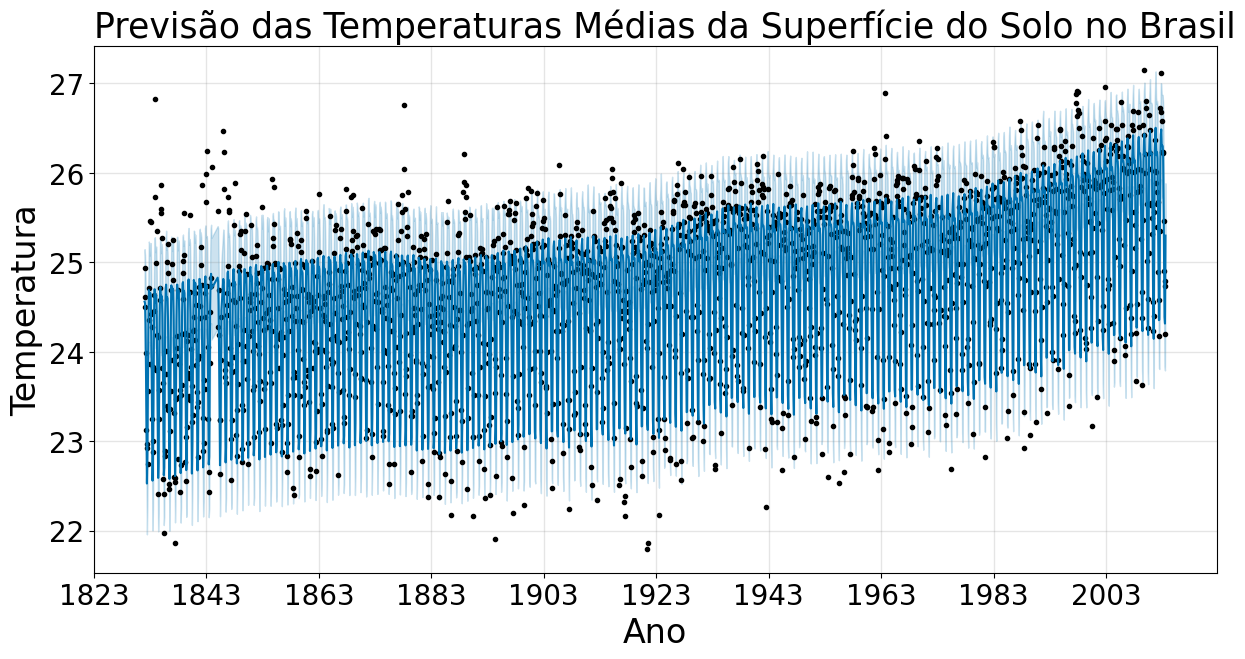

In [32]:
model.plot(predictions,
           figsize=(12, 6))

plt.title('Previsão das Temperaturas Médias da Superfície do Solo no Brasil',
          loc='left',
          fontsize=25)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura', fontsize=24)

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

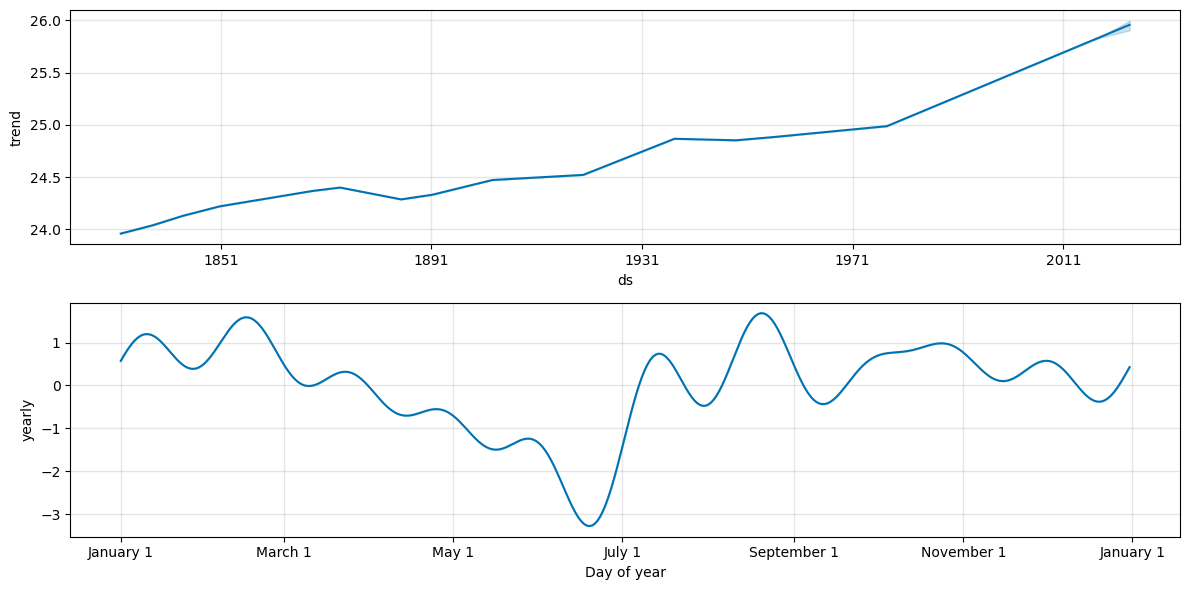

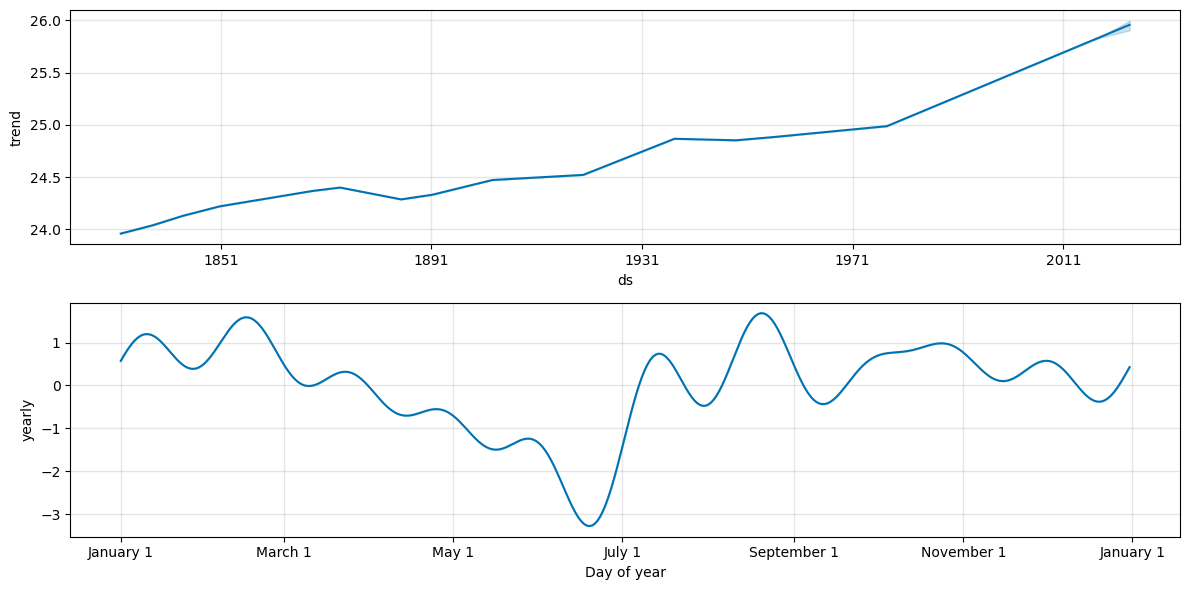

In [33]:
model.plot_components(predicitons,
                      figsize=(12, 6))

In [34]:
df.to_csv('./data/processed/df_br_prophet.csv', index=False)